In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv(r'E:\BetaLab\Outliers- July 18\Solid_Waste_Generation___Recycling.csv')
df.head()

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.0,2515427.0,6577102.3,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.0,2838771.0,6257801.0,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.0,2724337.0,6084275.0,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.0,2666863.0,6122052.0,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.0,4153915.0,6526087.0,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241


In [5]:
df=df.sort_values('Aluminum Cans')
df['Aluminum Cans'].head()

1     12540
2     12718
8     12842
11    13115
12    13635
Name: Aluminum Cans, dtype: int64

In [6]:
df['Aluminum Cans'].tail()

4     16010
13    16679
3     17608
0     17944
9     21098
Name: Aluminum Cans, dtype: int64

<Axes: xlabel='Aluminum Cans'>

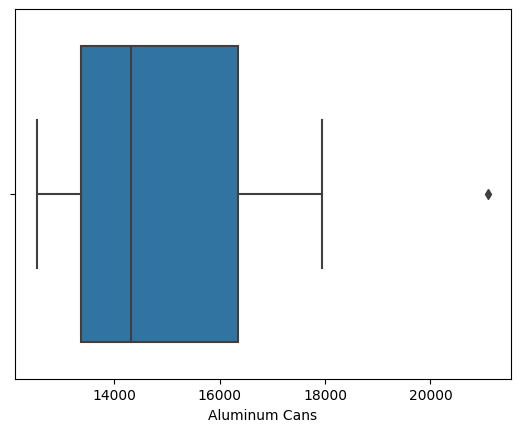

In [7]:
sns.boxplot(data=df,x='Aluminum Cans')

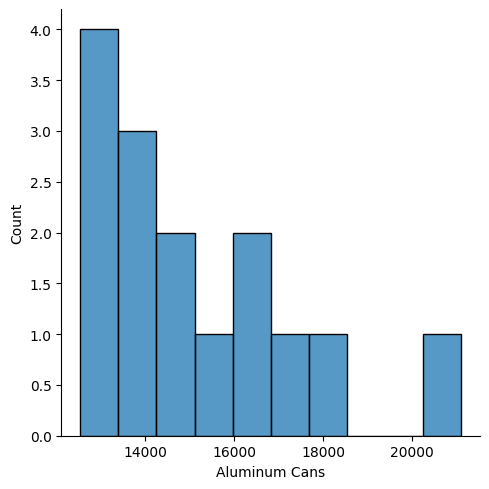

In [8]:
sns.displot(data=df,x='Aluminum Cans',bins=10)

In [9]:
#Calculate q3
q3=df['Aluminum Cans'].quantile(0.75)

In [10]:
#Calculate q1
q1=df['Aluminum Cans'].quantile(0.25)

In [12]:
# Calculate IQR
iqr=q3-q1
iqr

2969.5

In [14]:
#upperlimit
ul=q3+(1.5*iqr)
ul

20798.75

In [15]:
#lowerlimit
#ll=q1-(1.5*iqr)
ll=q1-(1.5*iqr)
ll

8920.75

In [17]:
print(ul,ll)

20798.75 8920.75


In [20]:
import numpy as np
upper=np.where(df['Aluminum Cans']>=ul)
upper

(array([14], dtype=int64),)

In [22]:
lower=np.where(df['Aluminum Cans']<=ll)
lower          

(array([], dtype=int64),)

In [23]:
df.drop(upper[0],inplace=True)
df.head()

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.00,2838771.0,6257801.00,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.00,2724337.0,6084275.00,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
8,2008,31800,12842,6586,43401,0,1510051,25219,569688,3297,...,1634267.82,4154879.4,7516908.74,9151177,14309506,15943774,47.47,6587600,13.261756,5.649965
11,2011,76645,13115,4872,44174,0,2211889,27297,542333,3653,...,1361117.00,3286676.0,6315653.00,7676770,14580362,15941479,56.68,6767900,12.906599,6.691304
12,2012,102732,13635,6797,54578,0,1887580,23356,520585,2420,...,887805.00,3612900.0,7135529.00,8023334,14996000,15883805,52.42,6817770,12.765838,6.317473


In [24]:
arr=df['Aluminum Cans'].values

In [25]:
true_index=(ll < arr) & (arr < ul)

In [26]:
true_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [29]:
# calculate themedianvalue
mid=np.median(df['Aluminum Cans'][true_index])

In [32]:
false_index=~true_index
df['Aluminum Cans'].values[false_index]=mid
df

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.00,2838771.00,6.257801e+06,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.00,2724337.00,6.084275e+06,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
8,2008,31800,12842,6586,43401,0,1510051,25219,569688,3297,...,1634267.82,4154879.40,7.516909e+06,9151177,14309506,15943774,47.47,6587600,13.261756,5.649965
11,2011,76645,13115,4872,44174,0,2211889,27297,542333,3653,...,1361117.00,3286676.00,6.315653e+06,7676770,14580362,15941479,56.68,6767900,12.906599,6.691304
12,2012,102732,13635,6797,54578,0,1887580,23356,520585,2420,...,887805.00,3612900.00,7.135529e+06,8023334,14996000,15883805,52.42,6817770,12.765838,6.317473
10,2010,55689,13655,4783,48881,20364,2188200,26986,471477,3867,...,1229535.00,3703149.00,7.043048e+06,8272583,15261820,16491355,53.85,6724540,13.437884,6.697018
7,2007,0,14005,7055,44667,2521,2089972,25734,555757,1193,...,1810580.00,4557764.00,8.082291e+06,9892871,15372234,17182814,47.42,6488000,14.511776,6.156734
6,2006,0,14951,7507,49796,4008,2295278,25414,570802,897,...,1689840.00,4164837.00,7.760714e+06,9450554,15442903,17132743,49.75,6375600,14.724582,6.602388
5,2005,0,15441,8767,47302,14588,1783418,28903,565698,186,...,2736151.00,5355491.00,7.696424e+06,10432575,14758169,17494320,47.85,6256400,15.321797,6.184786
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.00,4153915.00,6.526087e+06,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241
